In [1]:
import gymnasium as gym
 
import keyboard
import numpy as np
import time
env=gym.make('FrozenLake-v1', desc=None, is_slippery=True)
env.reset()
env.render()
# format of the returnValue: (observation,reward, terminated, truncated, info)
# observation (object)  - observed state
# reward (float)        - reward that is the result of taking the action
# terminated (bool)     - is it a terminal state
# truncated (bool)      - it is not used in this lab (it repressents the max time for reaching successfully  the end of episode
# info (dictionary)     - the transition probability
def MonteCarloLearnStateValueFct(env,stateNumber,numberOfEpisodes,discountRate):
     
    # return for every state
    ReturnOfState=np.zeros(stateNumber)
    # number of visits of every state
 
    numberVisitsOfState=np.zeros(stateNumber)
     
    # estimate of the value of each state
    valueFunctionEstimate=np.zeros(stateNumber)
     
    # initialization of the current episode
    for indexEpisode in range(numberOfEpisodes):
        # this list stores visited states in the current episode
        visitedStatesInEpisode=[]
        # this list stores the return of each visited state in the current episode
        rewardInVisitedState=[]
        (currentState,prob)=env.reset()
        print("currentState:",currentState)
        print("prob:",prob)
        visitedStatesInEpisode.append(currentState)
         
        print("Simulated episode",indexEpisode)
             
        # Starting Montecarlo simulation 
        # we randomly generate actions and advance in the path
        # when the terminal state is attained, the loop stops
        advance=True
        while advance:
             
            # select a random action
            randomAction= env.action_space.sample()
                        
            # here we step and return the state, reward, and boolean denoting if the state is a terminal state
            (currentState, currentReward, terminalState,_,_) = env.step(randomAction)          
             
            # append the reward
            rewardInVisitedState.append(currentReward)
             
            # if the current state is NOT terminal state 
            if not terminalState:
                visitedStatesInEpisode.append(currentState)   
            # if the current state IS terminal state 
            else: 
                #break
                advance=False

        # END of the actual episode simulation

        # how many states we visited in an episode    
        numberOfVisitedStates=len(visitedStatesInEpisode)
             
        # the gain is equal to: Gt=R_{t+1}+\gamma R_{t+2} + \gamma^2 R_{t+3} + ...
        Gt=0
        # we compute this quantity using a reverse "range":from len-1 until second argument +1, that is until 0
       
        for indexCurrentState in range(numberOfVisitedStates-1,-1,-1):
                 
            stateTmp=visitedStatesInEpisode[indexCurrentState] 
            returnTmp=rewardInVisitedState[indexCurrentState]
               
            # this is an intelligent way of summing the returns 
               
            Gt=discountRate*Gt+returnTmp
               
            # below is the first visit implementation 
            # we note that the notation a[0:3], includes a[0],a[1],a[2] and it does NOT include a[3]
            if stateTmp not in visitedStatesInEpisode[0:indexCurrentState]:
                #  this state is visited in the episode
                numberVisitsOfState[stateTmp]=numberVisitsOfState[stateTmp]+1
                # add the sum for the state to the total sum for the same state
                ReturnOfState[stateTmp]=ReturnOfState[stateTmp]+Gt
             
     
    #offline update of the states' values 
    # END of the simulated episode 
     
    # calculation of the final estimate of the state value 
    for indexSum in range(stateNumber):
        if numberVisitsOfState[indexSum] !=0:
            valueFunctionEstimate[indexSum]=ReturnOfState[indexSum]/numberVisitsOfState[indexSum]
         
    return valueFunctionEstimate           

/usr/lib/python3.13/site-packages/gymnasium/envs/toy_text/frozen_lake.py:334: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("FrozenLake-v1", render_mode="rgb_array")
  gym.logger.warn(


In [2]:

def MonteCarloLearnStateValueFctIncrementall(env,stateNumber,numberOfEpisodes,discountRate):

    # convergence list 
    convergenceList=[]
     
    # return for every state
    ReturnOfState=np.zeros(stateNumber)
    # number of visits of every state
 
    numberVisitsOfState=np.zeros(stateNumber)
     
    # estimate of the value of each state
    valueFunctionEstimate=np.zeros(stateNumber)
    # initialization of the current episode
    for indexEpisode in range(numberOfEpisodes):
        valueFunctionEstimate_old = np.copy(valueFunctionEstimate)
        # this list stores visited states in the current episode
        visitedStatesInEpisode=[]
        # this list stores the return of each visited state in the current episode
        rewardInVisitedState=[]
        (currentState,prob)=env.reset()
        print("currentState:",currentState)
        print("prob:",prob)
        visitedStatesInEpisode.append(currentState)
         
        print("Simulated episode",indexEpisode)
             
        # Starting Montecarlo simulation 
        # we randomly generate actions and advance in the path
        # when the terminal state is attained, the loop stops
        advance=True
        while advance:
             
            # select a random action
            randomAction= env.action_space.sample()
                        
            # here we step and return the state, reward, and boolean denoting if the state is a terminal state
            (currentState, currentReward, terminalState,_,_) = env.step(randomAction)          
             
            # append the reward
            rewardInVisitedState.append(currentReward)
             
            # if the current state is NOT terminal state 
            if not terminalState:
                visitedStatesInEpisode.append(currentState)   
            # if the current state IS terminal state 
            else: 
                #break
                advance=False

        # END of the actual episode simulation

        # how many states we visited in an episode    
        numberOfVisitedStates=len(visitedStatesInEpisode)
             
        # the gain is equal to: Gt=R_{t+1}+\gamma R_{t+2} + \gamma^2 R_{t+3} + ...
        Gt=0
        # we compute this quantity using a reverse "range":from len-1 until second argument +1, that is until 0
       
        for indexCurrentState in range(numberOfVisitedStates-1,-1,-1):
                 
            stateTmp=visitedStatesInEpisode[indexCurrentState] 
            returnTmp=rewardInVisitedState[indexCurrentState]
               
            # this is an intelligent way of summing the returns 
               
            Gt=discountRate*Gt+returnTmp
               
            # below is the first visit implementation 
            # we note that the notation a[0:3], includes a[0],a[1],a[2] and it does NOT include a[3]
            if stateTmp not in visitedStatesInEpisode[0:indexCurrentState]:
                #  this state is visited in the episode
                numberVisitsOfState[stateTmp]=numberVisitsOfState[stateTmp]+1
                valueFunctionEstimate[stateTmp]+=(1/numberVisitsOfState)*(Gt-valueFunctionEstimate[stateTmp])
        print("converge",np.max(np.abs(valueFunctionEstimate-valueFunctionEstimate_old)))
        convergenceList.append(np.max(np.abs(valueFunctionEstimate-valueFunctionEstimate_old)))

         
    return valueFunctionEstimate,convergenceList           

In [3]:

def MonteCarloLearnStateValueFctIncremental(env,stateNumber,numberOfEpisodes,discountRate):

    # convergence list 
    convergenceList=[]
     
    # number of visits of every state
 
    numberVisitsOfState=np.zeros(stateNumber)
     
    # estimate of the value of each state
    valueFunctionEstimate=np.zeros(stateNumber)
    valueFunctionEstimate_old=np.zeros(stateNumber)
    # initialization of the current episode
    for indexEpisode in range(numberOfEpisodes):
        valueFunctionEstimate_old = np.copy(valueFunctionEstimate)
        # this list stores visited states in the current episode
        visitedStatesInEpisode=[]
        # this list stores the return of each visited state in the current episode
        rewardInVisitedState=[]
        (currentState,prob)=env.reset()
        print("currentState:",currentState)
        print("prob:",prob)
        visitedStatesInEpisode.append(currentState)
         
        print("Simulated episode",indexEpisode)
             
        # Starting Montecarlo simulation 
        # we randomly generate actions and advance in the path
        # when the terminal state is attained, the loop stops
        advance=True
        while advance:
             
            # select a random action
            randomAction= env.action_space.sample()
                        
            # here we step and return the state, reward, and boolean denoting if the state is a terminal state
            (currentState, currentReward, terminalState,_,_) = env.step(randomAction)          
             
            # append the reward
            rewardInVisitedState.append(currentReward)
             
            # if the current state is NOT terminal state 
            if not terminalState:
                visitedStatesInEpisode.append(currentState)   
            # if the current state IS terminal state 
            else: 
                #break
                advance=False

        # END of the actual episode simulation

        # how many states we visited in an episode    
        numberOfVisitedStates=len(visitedStatesInEpisode)
             
        # the gain is equal to: Gt=R_{t+1}+\gamma R_{t+2} + \gamma^2 R_{t+3} + ...
        Gt=0
        # we compute this quantity using a reverse "range":from len-1 until second argument +1, that is until 0
       
        for indexCurrentState in range(numberOfVisitedStates-1,-1,-1):
                 
            stateTmp=visitedStatesInEpisode[indexCurrentState] 
            returnTmp=rewardInVisitedState[indexCurrentState]
               
            # this is an intelligent way of summing the returns 
               
            Gt=discountRate*Gt+returnTmp
               
            # below is the first visit implementation 
            # we note that the notation a[0:3], includes a[0],a[1],a[2] and it does NOT include a[3]
            if stateTmp not in visitedStatesInEpisode[0:indexCurrentState]:
                #  this state is visited in the episode
                numberVisitsOfState[stateTmp]=numberVisitsOfState[stateTmp]+1
                valueFunctionEstimate[stateTmp]=valueFunctionEstimate[stateTmp]+(1/numberVisitsOfState[stateTmp])*(Gt-valueFunctionEstimate[stateTmp])

        convergenceList.append(np.max(np.abs(valueFunctionEstimate-valueFunctionEstimate_old)))

         
    return valueFunctionEstimate,convergenceList           

In [4]:
def epsilon_greedy_policy(Q, state, epsilon,num_actions):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.randint(0, num_actions)  # Random action
    else:
        return np.argmax(Q[state])  # Greedy action

In [5]:
def evaluate_policy(env, Q, episodes=100):
    total_reward = 0
    successes = 0
    num_actions = env.action_space.n # Get action space size
    for _ in range(episodes):
        state, _ = env.reset()
        done = False
        episode_reward = 0
        steps=0
        max_steps = 100 # Prevent infinite loops in non-terminating policies

        while not done and steps < max_steps:
            # Use greedy action (epsilon=0)
            action = np.argmax(Q[state]) # Assuming discrete state

            step_result = env.step(action)
            if len(step_result) == 5:
                 next_state, reward, terminated, truncated, info = step_result
                 done = terminated or truncated
            else:
                 next_state, reward, terminated, info = step_result
                 done = terminated

            state = next_state
            episode_reward += reward
            steps += 1

        total_reward += episode_reward
        if episode_reward > 0: # Assuming reward > 0 only for success in FrozenLake
            successes += 1

    avg_reward = total_reward / episodes
    success_rate = successes / episodes
    return avg_reward, success_rate

In [56]:
def Sarsa(env,numberOfEpisodes,alpha,gamma,epsilon=0.1):
    convergence=[]
    Q = np.zeros((env.observation_space.n,env.action_space.n))
    old_Q=Q.copy()
    num_actions = env.action_space.n
    
    for indexEpisode in range(numberOfEpisodes):

        (currentState,prob)=env.reset()

        action = epsilon_greedy_policy(Q,state=currentState,epsilon=epsilon,num_actions=num_actions)

        advance=True

        while advance:


            # here we step and return the state, reward, and boolean denoting if the state is a terminal state
            (nex_state, reward, terminalState,_,_) = env.step(action)          
            next_action = epsilon_greedy_policy(Q,state=nex_state,epsilon=epsilon,num_actions=num_actions)
            
            #add the numbers of steps to the reward
            # SARSA update rule
            Q[currentState, action] += alpha * (reward + gamma * Q[nex_state, next_action] - Q[currentState,action])
            currentState = nex_state
            action = next_action

            if terminalState:
              advance=False
    
        eval_interval = 500 # Evaluate every 500 episodes
        if (indexEpisode + 1) % eval_interval == 0:
          avg_reward, success_rate = evaluate_policy(env, Q, episodes=100)
          convergence.append(success_rate)
          print(f"Episode {indexEpisode + 1}: Avg Reward (Test): {avg_reward:.3f}, Success Rate: {success_rate:.2f}, Epsilon: {epsilon:.4f}")

    plt.plot(range(eval_interval, numberOfEpisodes + 1, eval_interval), convergence)
    plt.xlabel(f"Episodes (x{eval_interval})")
    plt.ylabel("Total Q-Table Change")
    plt.title("SARSA Q-Table Convergence")
    plt.show()
    return Q

In [51]:
#  visualization
def DisplayGrid(valueFunction,reshapeDim,fileNameToSave):
    import seaborn as sns
    import matplotlib.pyplot as plt  
    ax = sns.heatmap(valueFunction.reshape(reshapeDim,reshapeDim),
                     annot=True, square=True,
                     cbar=False, cmap='Blues',
                     xticklabels=False, yticklabels=False)
    plt.savefig(fileNameToSave,dpi=600)
    plt.show()

In [52]:
import matplotlib.pyplot as plt

In [53]:
def play_frozen_lake(env, Q, num_episodes=5, max_steps_per_episode=100, pause_time=0.3):

    # --- Episode Loop ---
    for episode in range(num_episodes):
        # Reset environment for the new episode
        # Newer gym returns (state, info), older just state
        reset_result = env.reset()
        state = reset_result[0] if isinstance(reset_result, tuple) else reset_result

        done = False
        truncated = False # Gymnasium uses truncated flag
        total_reward = 0
        steps = 0

        print(f"\n--- Watching Episode {episode + 1} ---")

        # Loop within the episode
        while not done and not truncated and steps < max_steps_per_episode:
            # Render the current state *before* taking the action
            env.render()
            time.sleep(pause_time) # Pause to watch

            # Choose the BEST action based on Q-table (greedy)
            action = np.argmax(Q[state])

            # Take the action
            step_result = env.step(action)

            # Unpack results - handle older gym (4 results) vs newer (5 results)
            if len(step_result) == 5:
                next_state, reward, terminated, truncated, info = step_result
                done = terminated or truncated # Episode ends if terminated OR truncated
            else: # Fallback for older gym versions
                next_state, reward, terminated, info = step_result
                done = terminated
                truncated = False # Assume no truncation in older versions

            # Update state
            state = next_state
            total_reward += reward
            steps += 1

            # Check if done right after step to show the final state render
            if done or truncated:
                 env.render() # Render the final state (goal or hole)
                 time.sleep(pause_time * 2) # Longer pause at the end frame


        # --- End of Episode ---
        print(f"Episode finished after {steps} steps.")
        if reward == 1.0 and terminated: # Check standard FrozenLake success condition
            print(" Outcome: Reached the Goal! Hooray!")
        elif terminated: # Terminated but not goal (fell in hole)
            print(" Outcome: Fell in a Hole! Oops!")
        elif truncated:
            print(f" Outcome: Truncated at {max_steps_per_episode} steps (maybe stuck?).")
        else: # Should not happen if loop condition is correct
             print(f" Outcome: Unknown (Total Reward: {total_reward})")

        time.sleep(1.5) # Pause between episodes

    print("\n--- Finished Watching ---")

16
Episode 500: Avg Reward (Test): 0.000, Success Rate: 0.00, Epsilon: 0.1000
Episode 1000: Avg Reward (Test): 0.000, Success Rate: 0.00, Epsilon: 0.1000
Episode 1500: Avg Reward (Test): 0.000, Success Rate: 0.00, Epsilon: 0.1000
Episode 2000: Avg Reward (Test): 0.000, Success Rate: 0.00, Epsilon: 0.1000
Episode 2500: Avg Reward (Test): 0.000, Success Rate: 0.00, Epsilon: 0.1000
Episode 3000: Avg Reward (Test): 0.060, Success Rate: 0.06, Epsilon: 0.1000
Episode 3500: Avg Reward (Test): 0.080, Success Rate: 0.08, Epsilon: 0.1000
Episode 4000: Avg Reward (Test): 0.040, Success Rate: 0.04, Epsilon: 0.1000
Episode 4500: Avg Reward (Test): 0.220, Success Rate: 0.22, Epsilon: 0.1000
Episode 5000: Avg Reward (Test): 0.710, Success Rate: 0.71, Epsilon: 0.1000
Episode 5500: Avg Reward (Test): 0.770, Success Rate: 0.77, Epsilon: 0.1000
Episode 6000: Avg Reward (Test): 0.690, Success Rate: 0.69, Epsilon: 0.1000
Episode 6500: Avg Reward (Test): 0.730, Success Rate: 0.73, Epsilon: 0.1000
Episode 70

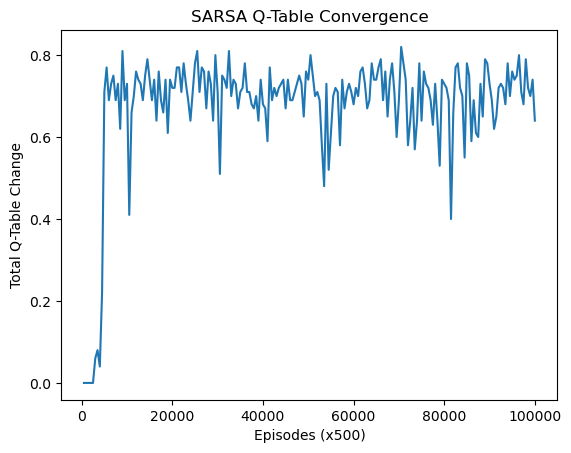

In [ ]:
# number of states in the environment
stateNumber=env.observation_space.n
print(env.observation_space.n)
 
# number of simulation episodes
numberOfEpisodes=100000

# initial policy is  uniformly random 
# there is an equal probability of choosing a particular action
initialPolicy=(1/4)*np.ones((16,4))
 
# discount rate
alpha=0.1
gamma = 0.99
# estimate the state value (function) through Monte Carlo method
#estimatedValuesMonteCarlo=MonteCarloLearnStateValueFct(env,stateNumber=stateNumber,numberOfEpisodes=numberOfEpisodes,discountRate=discountRate)
#estimatedValuesMonteCarlo,convergenceList=MonteCarloLearnStateValueFctIncremental(env,stateNumber=stateNumber,numberOfEpisodes=numberOfEpisodes,discountRate=discountRate)
#DisplayGrid(estimatedValuesMonteCarlo,reshapeDim=4,fileNameToSave='monteCarloEstimated.png') 
Q = Sarsa(env=env,alpha=alpha,gamma=gamma,epsilon=0.1,numberOfEpisodes=numberOfEpisodes) 

env.close()    


In [ ]:

env_render = gym.make("FrozenLake-v1",render_mode="human")

play_frozen_lake(env_render, Q, num_episodes=5, pause_time=0.1)

env_render.close()


--- Watching Episode 1 ---
Episode finished after 19 steps.
 Outcome: Reached the Goal! Hooray!

--- Watching Episode 2 ---
Episode finished after 68 steps.
 Outcome: Reached the Goal! Hooray!

--- Watching Episode 3 ---
Episode finished after 39 steps.
 Outcome: Reached the Goal! Hooray!

--- Watching Episode 4 ---
Episode finished after 36 steps.
 Outcome: Reached the Goal! Hooray!

--- Watching Episode 5 ---
Episode finished after 100 steps.
 Outcome: Reached the Goal! Hooray!

--- Finished Watching ---
